### Classification Error Metric Challenges

**Settings:  Where applicable, use test_size=0.30, random_state=4444.  This will permit comparison of results across users.

*These reference the Classification Challenges.*

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [21]:
datafile = '/Users/adamsantos/ds/metis/metisgh/nyc18_ds17/challenges/challenges_data/house-votes-84.data'
df = pd.read_csv(datafile,sep=',', header=None)
df = df.replace('n',0)
df = df.replace('y',1)

In [22]:
df = df.replace('?',df.mean(axis='columns'))

In [23]:
df=df.fillna(df.mean())
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.000000,1.0,0.000000,1.000000,republican.
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.0,0.000000,0.812689,republican.
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,democrat.
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,democrat.
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.000000,1.0,1.000000,1.000000,democrat.
5,0.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,democrat.
6,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.509756,1.0,1.000000,1.000000,democrat.
7,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.0,0.427518,1.000000,republican
8,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.0,0.000000,1.000000,republican
9,1.00000,1.0,1.0,0.000000,0.000000,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.427518,0.812689,democrat


In [24]:
df[16] = df[16].map(lambda x: x.rstrip('.'))

In [25]:
df[16].value_counts()

democrat      267
republican    168
Name: 16, dtype: int64

In [26]:
from sklearn.cross_validation import train_test_split

X = df.drop(16, axis=1)
y = df[16]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

In [46]:
y_pred_lr = pd.Series(y_pred_lr)
y_pred_lr[1]

'republican'

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, roc_curve

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Accuracy: "+str(accuracy_score(y_test, y_pred_lr)))
print("Logistic Recall: "+str(recall_score(y_test, y_pred_lr,pos_label='democrat')))
print("Logistic Precision: "+str(precision_score(y_test, y_pred_lr,pos_label='democrat')))
print("Logistic F1: "+str(f1_score(y_test, y_pred_lr,pos_label='democrat')))



Logistic Accuracy: 0.9389312977099237
Logistic Recall: 0.974025974025974
Logistic Precision: 0.9259259259259259
Logistic F1: 0.949367088607595


In [50]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy: "+str(accuracy_score(y_test, y_pred_knn)))
print("KNN Recall: "+str(recall_score(y_test, y_pred_knn,pos_label='democrat')))
print("KNN Precision: "+str(precision_score(y_test, y_pred_knn,pos_label='democrat')))
print("KNN F1: "+str(f1_score(y_test, y_pred_knn,pos_label='democrat')))

KNN Accuracy: 0.9007633587786259
KNN Recall: 0.922077922077922
KNN Precision: 0.9102564102564102
KNN F1: 0.9161290322580644


#### Challenge 2

For each, draw the ROC curve and calculate the AUC.




AUC LR: 0.9877344877344877
AUC KNN: 0.945887445887446


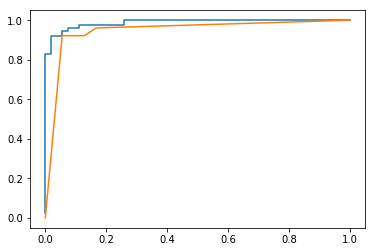

In [76]:
y_predictprob_lr = lr.predict_proba(X_test)
y_predictprob_knn = knn.predict_proba(X_test)

fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_predictprob_lr[:, 0], pos_label='democrat')
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_predictprob_knn[:, 0], pos_label='democrat')

plt.plot(fpr_lr, tpr_lr)
plt.plot(fpr_knn, tpr_knn)

c = (y_test == 'democrat').astype(int)

print("AUC LR: "+ str(roc_auc_score(c, y_predictprob_lr[:, 0])))
print("AUC KNN: "+ str(roc_auc_score(c, y_predictprob_knn[:, 0])))

#roc_auc_score(c,y_predictprob_lr[:, 0] )


#### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the `cross_val_score` function (like in Challenge 9).




In [89]:
from sklearn.cross_validation import cross_val_score

d = (y == 'democrat').astype(int)

lr_recall = cross_val_score(lr, X, d, cv=5, scoring='recall')
test = np.mean(lr_recall, axis=0)
print('Logistic Recall: '+str(test))
lr_precision = cross_val_score(lr, X, d, cv=5, scoring='precision')
test1 = np.mean(lr_precision, axis=0)
print('Logistic Precision: '+str(test1))
lr_f1 = cross_val_score(lr, X, d, cv=5, scoring='f1')
test2 = np.mean(lr_f1, axis=0)
print('Logistic Fl: '+str(test2))


Logistic Recall: 0.9624737945492662
Logistic Precision: 0.9698715754645673
Logistic Fl: 0.9657243730893548


In [90]:
d = (y == 'democrat').astype(int)

lr_recall = cross_val_score(knn, X, d, cv=5, scoring='recall')
test = np.mean(lr_recall, axis=0)
print('KNN Recall: '+str(test))
lr_precision = cross_val_score(knn, X, d, cv=5, scoring='precision')
test1 = np.mean(lr_precision, axis=0)
print('KNN Precision: '+str(test1))
lr_f1 = cross_val_score(knn, X, d, cv=5, scoring='f1')
test2 = np.mean(lr_f1, axis=0)
print('KNN Fl: '+str(test2))

KNN Recall: 0.9253668763102724
KNN Precision: 0.9658574647697844
KNN Fl: 0.9439294488827199


#### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.




In [94]:
datafile = '/Users/adamsantos/ds/metis/metisgh/nyc18_ds17/challenges/challenges_data/2013_movies.csv'

df_movies = pd.read_csv(datafile,sep=',')
dums2 = pd.get_dummies(df_movies['Director'])

df_movies = df_movies.merge(dums2, how='outer', left_index=True, right_index=True)
df_movies=df_movies.dropna(axis='rows')

In [95]:
X_movies = df_movies.drop(["Rating",'ReleaseDate','Title','Director'],axis=1)
y_movies = df_movies['Rating']

X_train, X_test, y_train, y_test = train_test_split(X_movies, y_movies, test_size=0.2,random_state=42)

In [97]:
knn_movies = KNeighborsClassifier(n_neighbors=10)
lr_movies = LogisticRegression()

knn_movies.fit(X_train,y_train)
lr_movies.fit(X_train,y_train)
y_knns=knn_movies.predict(X_test)
y_lrs=lr_movies.predict(X_test)

In [99]:
print("Logistic Recall: "+str(recall_score(y_test, y_lrs, average='micro')))
print("Logistic Precision: "+str(precision_score(y_test, y_lrs,average='micro')))

print("KNN Recall: "+str(recall_score(y_test, y_knns,average='micro')))
print("KNN Precision: "+str(precision_score(y_test, y_knns,average='micro')))

Logistic Recall: 0.5555555555555556
Logistic Precision: 0.5555555555555556
KNN Recall: 0.7777777777777778
KNN Precision: 0.7777777777777778


#### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [100]:
datafile = '/Users/adamsantos/ds/metis/metisgh/nyc18_ds17/challenges/challenges_data/haberman.data'

df_cancer = pd.read_csv(datafile,sep=',', header=None)
df_cancer.columns=['Age','Year','Nodes','Survive?']

In [101]:
lr_cancer = LogisticRegression()
X_cancer = df_cancer.drop('Survive?',axis=1)
y_cancer = df_cancer['Survive?']

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2,random_state=42)

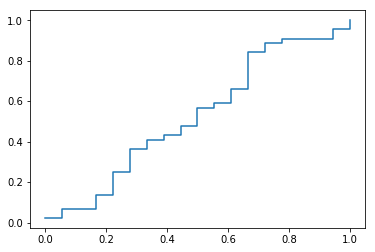

In [109]:
lr_cancer.fit(X_train,y_train)

y_predictprob_lr = lr_cancer.predict_proba(X_test)

c = (y_test == 1).astype(int)

fpr_lr, tpr_lr, thresholds = roc_curve(c, y_predictprob_lr[:, 0])

plt.plot(fpr_lr, tpr_lr)

In [110]:
print("AUC LR: "+ str(roc_auc_score(c, y_predictprob_lr[:, 0])))

AUC LR: 0.5252525252525253
